In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

c:\Users\wesse\anaconda3\envs\tensorenv\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
df = pd.read_csv(r'C:\Users\wesse\Avans\Minor\pokedex_(Update_04.21).csv')
df = df.drop(['Unnamed: 0', 'german_name', 'japanese_name'], axis=1)
# for all rows with a duplicate pokedex_number, keep the first row
df = df.drop_duplicates(subset='pokedex_number', keep='first')
df.head()

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
5,5,Charmeleon,1,Normal,Flame Pokémon,1,Fire,NaN,1.1,19.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [3]:
df['status'].value_counts()

status
Normal           806
Sub Legendary     46
Legendary         24
Mythical          22
Name: count, dtype: int64

In [4]:
# define the features and target
features = ['generation', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'catch_rate']
target = 'status'
# train test split
train, test = train_test_split(df, test_size=0.3, random_state=42)
X_train = train[features]
X_test = test[features]
y_train = train[target]
y_test = test[target]
print(df[features].dtypes)

generation        int64
total_points      int64
hp                int64
attack            int64
defense           int64
sp_attack         int64
sp_defense        int64
speed             int64
catch_rate      float64
dtype: object


In [5]:
# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
import time

# create a logistic regression model
log_reg = LogisticRegression()

# start the timer
start_time = time.time()

# fit the model
log_reg.fit(X_train, y_train)

# predict using the model
y_pred = log_reg.predict(X_test)

# end the timer
end_time = time.time()

# calculate the elapsed time in milliseconds
elapsed_time_ms = (end_time - start_time) * 1000

print('Logistic Regression')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# get macro avg results
macro_avg = classification_report(y_test, y_pred, output_dict=True)['macro avg']
precision, recall, f1 = macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score']

# write results on a new line in the results.csv file
with open(r'C:\Users\wesse\Avans\Minor\ML2_Uitstapje\results.csv', 'a') as f:
    f.write(f'\nLogistic Regression, {precision}, {recall}, {f1}, {elapsed_time_ms}')

Logistic Regression
[[  3   0   1   0]
 [  0   0   2   4]
 [  0   0 244   2]
 [  1   0   3  10]]
               precision    recall  f1-score   support

    Legendary       0.75      0.75      0.75         4
     Mythical       0.00      0.00      0.00         6
       Normal       0.98      0.99      0.98       246
Sub Legendary       0.62      0.71      0.67        14

     accuracy                           0.95       270
    macro avg       0.59      0.61      0.60       270
 weighted avg       0.93      0.95      0.94       270



c:\Users\wesse\anaconda3\envs\tensorenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wesse\anaconda3\envs\tensorenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wesse\anaconda3\envs\tensorenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [7]:
# create a random_forest model
random_forest = RandomForestClassifier()

# start the timer
start_time = time.time()

# fit the model
random_forest.fit(X_train, y_train)

# predict using the model
y_pred = random_forest.predict(X_test)

# end the timer
end_time = time.time()

# calculate the elapsed time in milliseconds
elapsed_time_ms = (end_time - start_time) * 1000

print('Random Forest')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# get macro avg results
macro_avg = classification_report(y_test, y_pred, output_dict=True)['macro avg']
precision, recall, f1 = macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score']

# write results on a new line in the results.csv file
with open(r'C:\Users\wesse\Avans\Minor\ML2_Uitstapje\results.csv', 'a') as f:
    f.write(f'\nRandom Forest, {precision}, {recall}, {f1}, {elapsed_time_ms}')

Random Forest
[[  3   0   1   0]
 [  0   4   1   1]
 [  0   2 244   0]
 [  2   2   0  10]]
               precision    recall  f1-score   support

    Legendary       0.60      0.75      0.67         4
     Mythical       0.50      0.67      0.57         6
       Normal       0.99      0.99      0.99       246
Sub Legendary       0.91      0.71      0.80        14

     accuracy                           0.97       270
    macro avg       0.75      0.78      0.76       270
 weighted avg       0.97      0.97      0.97       270



In [8]:
# add the wrong guesses from the random forest model to a new dataframe
test['y_pred'] = y_pred
false_predictions = test[test['status'] != test['y_pred']]
false_predictions[['pokedex_number', 'name', 'status', 'y_pred']]

,pokedex_number,name,status,y_pred
450,376,Metagross,Normal,Mythical
944,808,Meltan,Mythical,Normal
457,381,Latios,Sub Legendary,Mythical
300,248,Tyranitar,Normal,Mythical
923,790,Cosmoem,Legendary,Normal
842,719,Diancie,Mythical,Sub Legendary
1041,897,Spectrier,Sub Legendary,Mythical
584,488,Cresselia,Sub Legendary,Legendary
581,486,Regigigas,Sub Legendary,Legendary


In [9]:
from sklearn.preprocessing import LabelEncoder

# convert string labels to numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# start the timer
start_time = time.time()

# create a Keras Sequential model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 output neurons for 4 classes

# compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# predict using the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# end the timer
end_time = time.time()

# calculate the elapsed time in milliseconds
elapsed_time_ms = (end_time - start_time) * 1000

# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Keras Sequential Model\nAccuracy: {accuracy}')

# get classification report
print(classification_report(y_test, y_pred_classes))

# get macro avg results
macro_avg = classification_report(y_test, y_pred_classes, output_dict=True)['macro avg']
precision, recall, f1 = macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score']

# write results on a new line in the results.csv file
with open(r'C:\Users\wesse\Avans\Minor\ML2_Uitstapje\results.csv', 'a') as f:
    f.write(f'\nNeural Network(1L 8N), {precision}, {recall}, {f1}, {elapsed_time_ms}')

Epoch 1/100
63/63 [==============================] - 1s 1ms/step - loss: 1.4055 - accuracy: 0.2564
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 1.0313 - accuracy: 0.6433
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 0.8273 - accuracy: 0.8057
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7074 - accuracy: 0.8519
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.8758
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.8854
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.8885
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.8901
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4547 - accuracy: 0.8901
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8901
Epoch 11/

In [10]:
# start the timer
start_time = time.time()

# create a Keras Sequential model with 2 hidden layers
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # first hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # second hidden layer with 32 neurons
model.add(Dense(4, activation='softmax'))  # output layer with 4 neurons for 4 classes

# compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# predict using the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# end the timer
end_time = time.time()

# calculate the elapsed time in milliseconds
elapsed_time_ms = (end_time - start_time) * 1000

# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Keras Sequential Model with 2 Hidden Layers\nAccuracy: {accuracy}')

# get classification report
print(classification_report(y_test, y_pred_classes))

# get macro avg results
macro_avg = classification_report(y_test, y_pred_classes, output_dict=True)['macro avg']
precision, recall, f1 = macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score']

# write results on a new line in the results.csv file
with open(r'C:\Users\wesse\Avans\Minor\ML2_Uitstapje\results.csv', 'a') as f:
    f.write(f'\nNeural Network(2L 64N-32N), {precision}, {recall}, {f1}, {elapsed_time_ms}')


Epoch 1/100
63/63 [==============================] - 1s 2ms/step - loss: 0.9233 - accuracy: 0.7293
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.8917
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8917
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8933
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9076
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.9092
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.9204
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9188
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9236
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9268
Epoch 11/

In [11]:
import optuna
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def create_model(trial):
    # Define the model
    model = Sequential()
    model.add(Dense(trial.suggest_int('units_layer_1', 4, 128), input_dim=X_train.shape[1], activation='relu'))
    
    # Add additional layers based on trial suggestions
    for i in range(trial.suggest_int('n_layers', 1, 3)):
        model.add(Dense(trial.suggest_int(f'units_layer_{i+2}', 4, 128), activation='relu'))
    
    model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons for 4 classes

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def objective(trial):
    model = create_model(trial)
    
    # Fit the model
    model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    return accuracy

start_time = time.time()

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best trial
print('Best trial:')
trial = study.best_trial
print(f'  Value: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

# Create the best model and add it to the results.csv file
model = create_model(trial)
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
y_pred = model.predict(X_test)

# end the timer
end_time = time.time()

# calculate the elapsed time in milliseconds
elapsed_time_ms = (end_time - start_time) * 1000

y_pred_classes = np.argmax(y_pred, axis=1)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Optuna Neural Network\nAccuracy: {accuracy}')
print(classification_report(y_test, y_pred_classes))

# get macro avg results
macro_avg = classification_report(y_test, y_pred_classes, output_dict=True)['macro avg']
precision, recall, f1 = macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score']
with open(r'C:\Users\wesse\Avans\Minor\ML2_Uitstapje\results.csv', 'a') as f:
    f.write(f'\nNeural Network(Optuna), {precision}, {recall}, {f1}, {elapsed_time_ms}')


c:\Users\wesse\anaconda3\envs\tensorenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-09-30 17:30:34,251] A new study created in memory with name: no-name-660251d3-5d88-438b-83b5-be173cdaa3cf
C:\Users\wesse\AppData\Local\Temp\ipykernel_17748\320709178.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)),
[I 2024-09-30 17:30:43,129] Trial 0 finished with value: 0.9074074029922485 and parameters: {'units_layer_1': 22, 'n_layers': 2, 'units_layer_2': 64, 'units_layer_3': 88, 'learning_rate': 0.06936540807883416}. Best is trial 0 with value: 0.9074074029

Best trial:
  Value: 0.9666666388511658
  Params: 
    units_layer_1: 16
    n_layers: 1
    units_layer_2: 80
    learning_rate: 0.02272805507005153
9/9 [==============================] - 0s 2ms/step
Optuna Neural Network
Accuracy: 0.9481481313705444
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         6
           2       0.98      0.98      0.98       246
           3       0.67      0.57      0.62        14

    accuracy                           0.95       270
   macro avg       0.72      0.70      0.71       270
weighted avg       0.95      0.95      0.95       270



In [16]:
# read the data from the results.csv file and plot a benchmark table
results = pd.read_csv(r'C:\Users\wesse\Avans\Minor\ML2_Uitstapje\results.csv')
results['Time(ms)'] = results['Time(ms)'].apply(lambda x: round(x, 2))
results.reset_index(drop=True, inplace=True)
results

,Model,Precision,Recall,F1 Score,Time(ms)
0,Logistic Regression,0.587750,0.614039,0.600134,33.00
1,Random Forest,0.750240,0.780706,0.757491,242.16
2,Neural Network(1L 8N),0.824901,0.622024,0.644588,12693.77
3,Neural Network(2L 64N-32N),0.555992,0.545587,0.537024,14046.02
4,Neural Network(Optuna),0.723118,0.701292,0.711285,872516.66


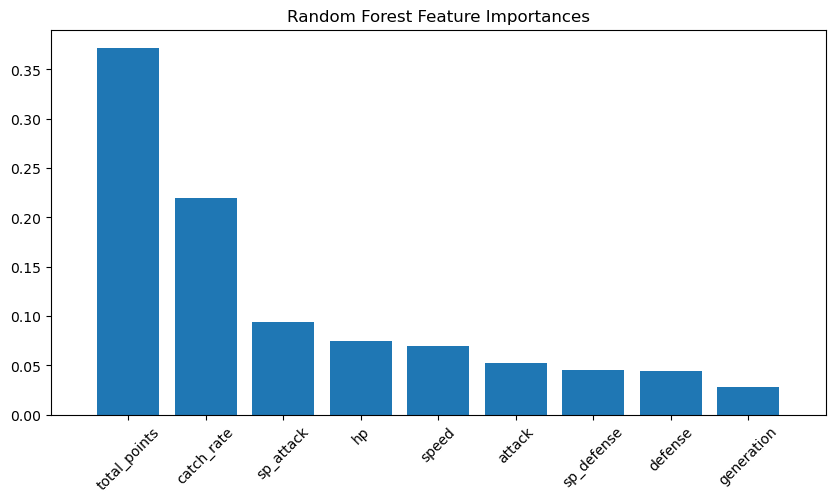

In [17]:
# plot the feature importance of the random forest model
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title('Random Forest Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

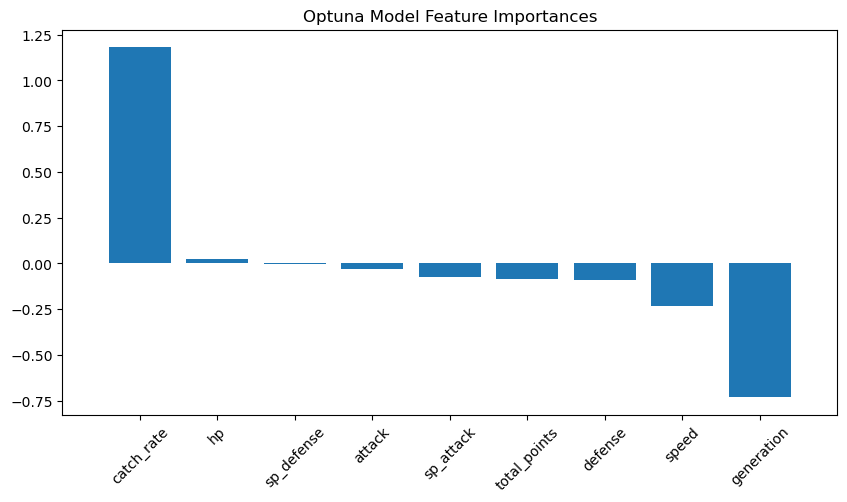

In [18]:
# plot the feature importance of the optuna model
importances = model.get_weights()[0].mean(axis=1)  # Average weights across neurons
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title('Optuna Model Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.xlim([-1, len(importances)])
plt.show()